In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
print(os.listdir('/kaggle/input/fer2013'))

['test', 'train']


In [3]:
train_path = '/kaggle/input/fer2013/train'
val_path = '/kaggle/input/fer2013/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import Sequential
from tensorflow import keras
from sklearn.model_selection import KFold

In [5]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [6]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

In [8]:
print(os.listdir('/kaggle/input/fer2013/train'))

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [9]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(12, 12))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

Surprise: 



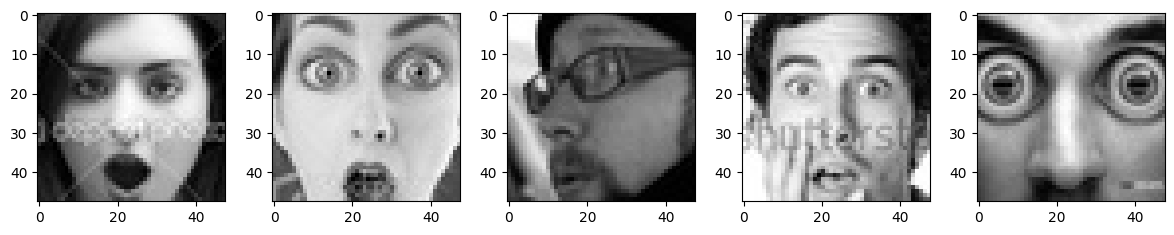

In [10]:
print('Surprise: ')
print()
plot_images(train_path+'/surprise')

Disgust: 



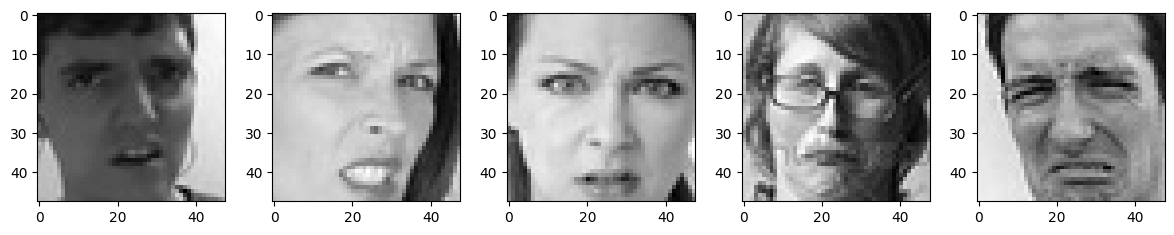

In [11]:
print('Disgust: ')
print()
plot_images(train_path+'/disgust')

Angry: 



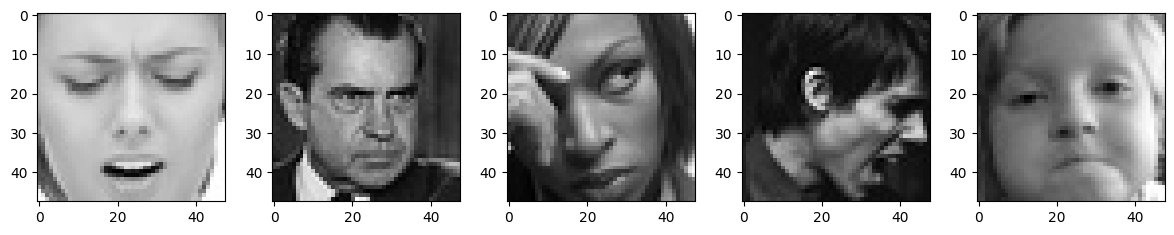

In [12]:
print('Angry: ')
print()
plot_images(train_path+'/angry')

Fear: 



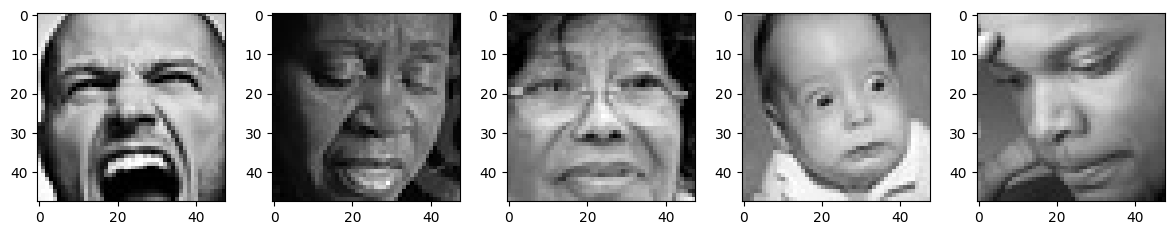

In [13]:
print('Fear: ')
print()
plot_images(train_path+'/fear')

Happy: 



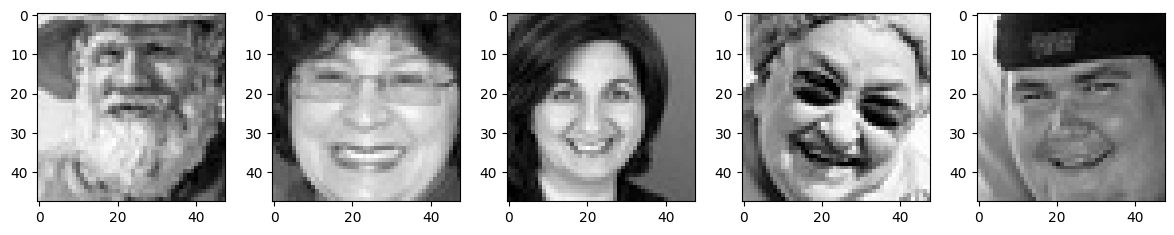

In [14]:
print('Happy: ')
print()
plot_images(train_path+'/happy')

Neutral: 



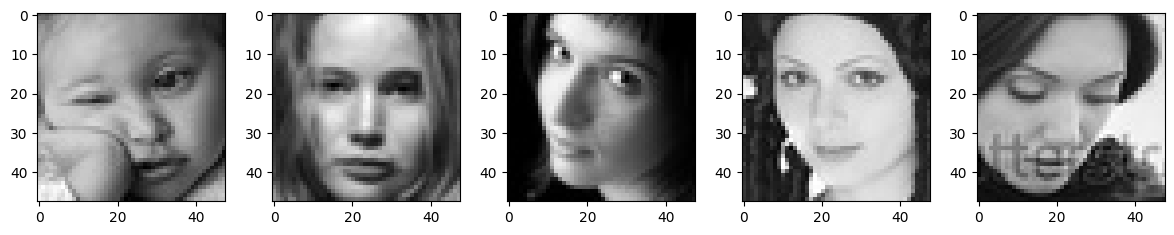

In [15]:
print('Neutral: ')
print()
plot_images(train_path+'/neutral')

Sad: 



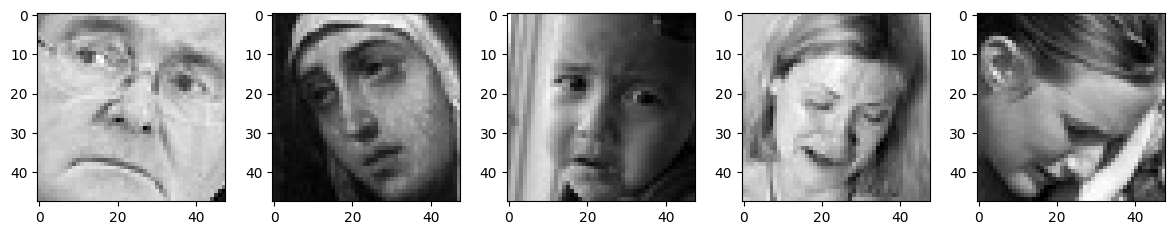

In [16]:
print('Sad: ')
print()
plot_images(train_path+'/sad')

In [17]:
emotions = os.listdir('/kaggle/input/fer2013/train')
for emotion in emotions:
    count = len(os.listdir(f'/kaggle/input/fer2013/train/{emotion}'))
    print(f'{emotion} faces={count}')

surprise faces=3171
fear faces=4097
angry faces=3995
neutral faces=4965
sad faces=4830
disgust faces=436
happy faces=7215


In [18]:
emotions = os.listdir('/kaggle/input/fer2013/test')
for emotion in emotions:
    count = len(os.listdir(f'/kaggle/input/fer2013/test/{emotion}'))
    print(f'{emotion} faces={count}')

surprise faces=831
fear faces=1024
angry faces=958
neutral faces=1233
sad faces=1247
disgust faces=111
happy faces=1774


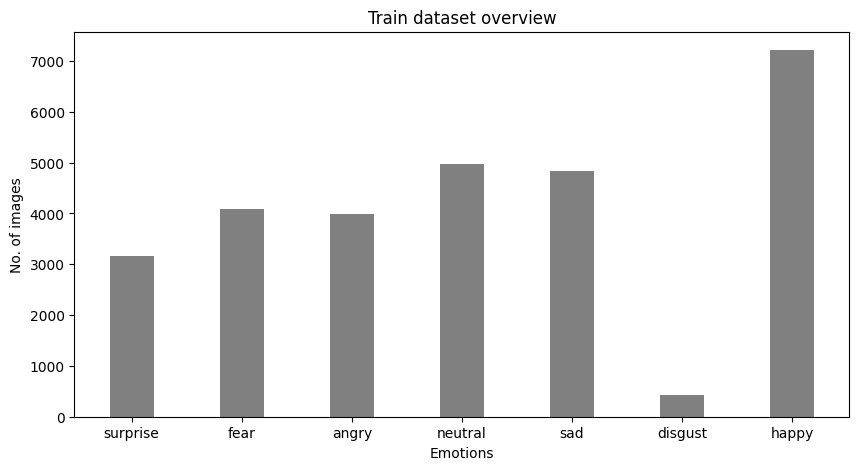

In [19]:
emotions = os.listdir('/kaggle/input/fer2013/train')
values = [len(os.listdir(f'/kaggle/input/fer2013/train/{emotion}')) for emotion in emotions]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(emotions, values, color ='grey',
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Train dataset overview")
plt.show()

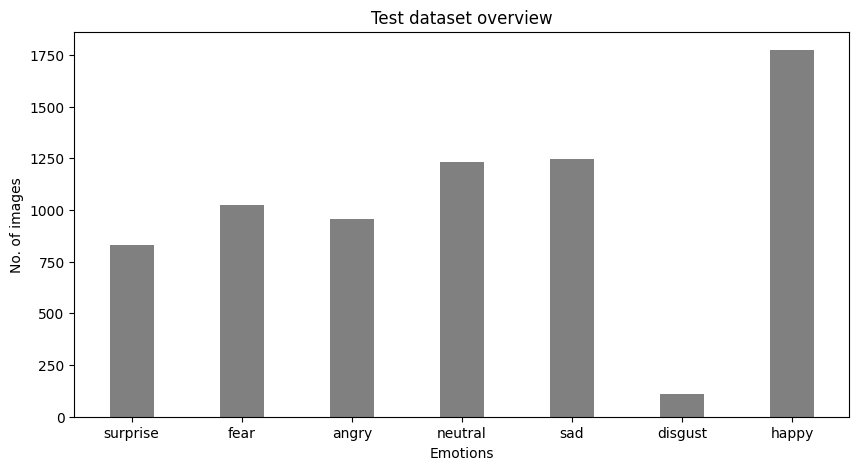

In [20]:
emotions = os.listdir('/kaggle/input/fer2013/test')
values = [len(os.listdir(f'/kaggle/input/fer2013/test/{emotion}')) for emotion in emotions]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(emotions, values, color ='grey',
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Test dataset overview")
plt.show()

SVM TRAINING

In [21]:
num_epochs = 200
number_of_classes = 7

In [22]:
model = Sequential()
model.add(layers.Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2,2),strides = 2))

model.add(layers.Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(layers.MaxPool2D(pool_size=(2,2),strides = 2))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))

#Output layer
model.add(layers.Dense(1,kernel_regularizer=regularizers.l2(0.01),activation = "linear"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(layers.Dense(number_of_classes,kernel_regularizer = regularizers.l2(0.01),activation= "softmax"))
model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,295 (614.43 KB)

 Trainable params: 157,295 (614.43 KB)

 Non-trainable params: 0 (0.00 B)

MODEL TRAINING


In [24]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VAL   = val_generator.n//val_generator.batch_size

In [25]:
history = model.fit(x=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, batch_size=batch_size, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 170s 369ms/step - accuracy: 0.2510 - loss: 1.2427 - val_accuracy: 0.2732 - val_loss: 1.2055
Epoch 2/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 96us/step - accuracy: 0.3594 - loss: 1.1843 - val_accuracy: 0.2000 - val_loss: 1.2205
Epoch 3/200


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.2847 - loss: 1.2008 - val_accuracy: 0.3122 - val_loss: 1.1873
Epoch 4/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 51us/step - accuracy: 0.4062 - loss: 1.1890 - val_accuracy: 0.5000 - val_loss: 1.1272
Epoch 5/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.3196 - loss: 1.1846 - val_accuracy: 0.3513 - val_loss: 1.1720
Epoch 6/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.3438 - loss: 1.1855 - val_accuracy: 0.4000 - val_loss: 1.2123
Epoch 7/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - accuracy: 0.3435 - loss: 1.1724 - val_accuracy: 0.3677 - val_loss: 1.1664
Epoch 8/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 52us/step - accuracy: 0.3438 - loss: 1.1948 - val_accuracy: 0.1000 - val_loss: 1.1948
Epoch 9/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.3560 - loss: 1.1664 - val_accuracy: 0.3576 - val_loss: 1.1669
Epoch 10/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.3281 - loss: 1.1747 - val_acc

In [26]:
models.save_model(model, 'SVM.h5')

In [27]:
svm_score = model.evaluate(val_generator, steps=STEP_SIZE_VAL) 
print('Test loss: ', svm_score[0])
print('Test accuracy: ', svm_score[1])

112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.4485 - loss: 1.1537
Test loss:  1.153745412826538
Test accuracy:  0.4485211968421936


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


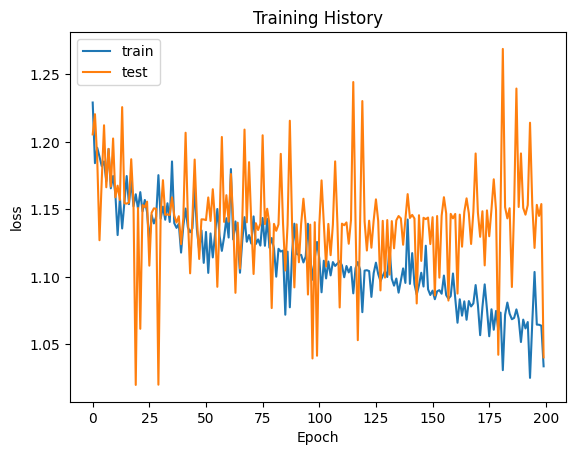

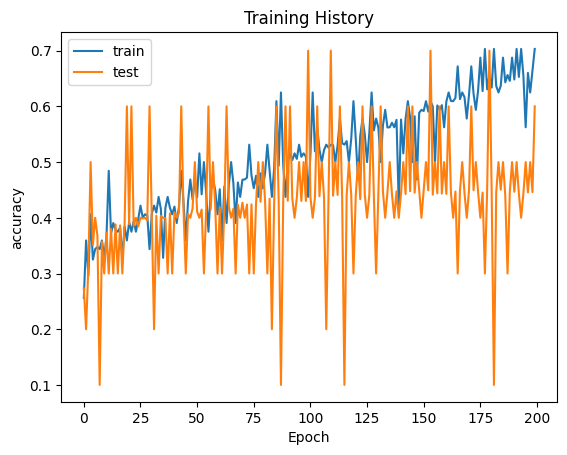

In [28]:
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')